In [47]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from featurewiz import featurewiz

In [13]:
data = pd.read_csv('D:\\LifeSpark Technology\\seg_fts.csv', index_col = False)

In [16]:
data = data.iloc[:,1:]

In [17]:
data

,ax_mean,ay_mean,az_mean,gx_mean,gy_mean,gz_mean,ax_std,ay_std,az_std,gx_std,...,ay_energy_fft,az_energy_fft,gx_energy_fft,gy_energy_fft,gz_energy_fft,avg_result_accl_fft,avg_result_gyr_fft,sma_accl_fft,sma_gyr_fft,labels
0,-2.682667,-10.139333,-0.732000,-0.070667,0.202667,-0.494667,5.194096,2.065154,1.808256,0.352769,...,1606.0641,57.0842,1.9416,6.8320,7.9494,31.321397,3.492806,43.589962,5.458815,1.0
1,-1.583333,-10.230667,-0.586667,0.090000,0.078667,0.376667,3.631976,1.250053,2.428974,0.413102,...,1593.4376,93.6614,2.6813,20.7520,10.7843,24.712313,5.017730,33.626980,7.804584,1.0
2,-1.522000,-10.416000,-0.831333,-0.158000,-0.003333,-0.263333,3.652229,1.960333,1.643208,0.426274,...,1685.0394,50.8687,3.1001,6.5563,11.5593,25.265664,4.026837,35.720270,6.512574,1.0
3,-1.558667,-10.310000,-0.800000,0.063333,0.094667,0.166667,3.109707,0.938730,2.336154,0.441825,...,1607.6597,91.4642,2.9883,14.7728,8.2886,22.769705,4.342778,31.003138,6.980384,1.0
4,-1.096667,-9.851333,-0.840000,-0.183333,-0.118000,0.004667,4.143566,2.217773,1.197308,0.465198,...,1529.5093,32.0872,3.7503,16.9777,11.7013,26.888499,4.764333,36.423519,7.384689,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193175,-3.770000,-9.188667,0.083333,0.106667,0.124000,-0.009333,1.437558,0.705614,1.190466,0.118472,...,1273.9423,21.3623,0.3812,2.3940,0.2198,16.983494,1.420668,24.023989,2.072037,0.0
193176,-3.620000,-6.991333,-1.279333,1.133333,0.071333,0.096000,5.864693,7.380452,5.477517,4.284572,...,1550.2473,474.5983,294.6300,1.8323,0.4582,47.578438,17.230397,77.931963,19.060306,0.0
193177,-4.493333,-8.822667,-0.332667,-0.046000,-0.043333,0.068000,0.648266,0.541904,1.061530,0.051225,...,1171.9966,18.5627,0.0711,0.6565,0.1184,14.423410,0.774680,20.433855,1.140450,0.0
193178,-4.168000,-8.815333,-0.126667,0.058667,0.172667,0.047333,5.506124,2.091156,2.193693,0.072191,...,1231.2455,72.4250,0.1298,1.8853,0.2105,31.044390,1.261819,45.318520,1.797580,0.0


In [50]:
X_full = data.drop(['labels'],axis=1)
 
y_full = data.labels.values 

In [54]:
X_scaled_full =  StandardScaler().fit_transform(X_full)

X_train, X_valid, y_train, y_valid = train_test_split(X_scaled_full,y_full,test_size = 0.3,stratify=y_full, random_state=1)



In [55]:
classifier_full = RandomForestClassifier()
 
classifier_full.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
# make prediction 
preds_full = classifier_full.predict(X_valid) 
# check performance
accuracy_score(preds_full,y_valid) 

0.8691893570763018

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (193180, 166)
    Loaded train data. Shape = (193180, 166)
    Some column names had special characters which were removed...
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#################################

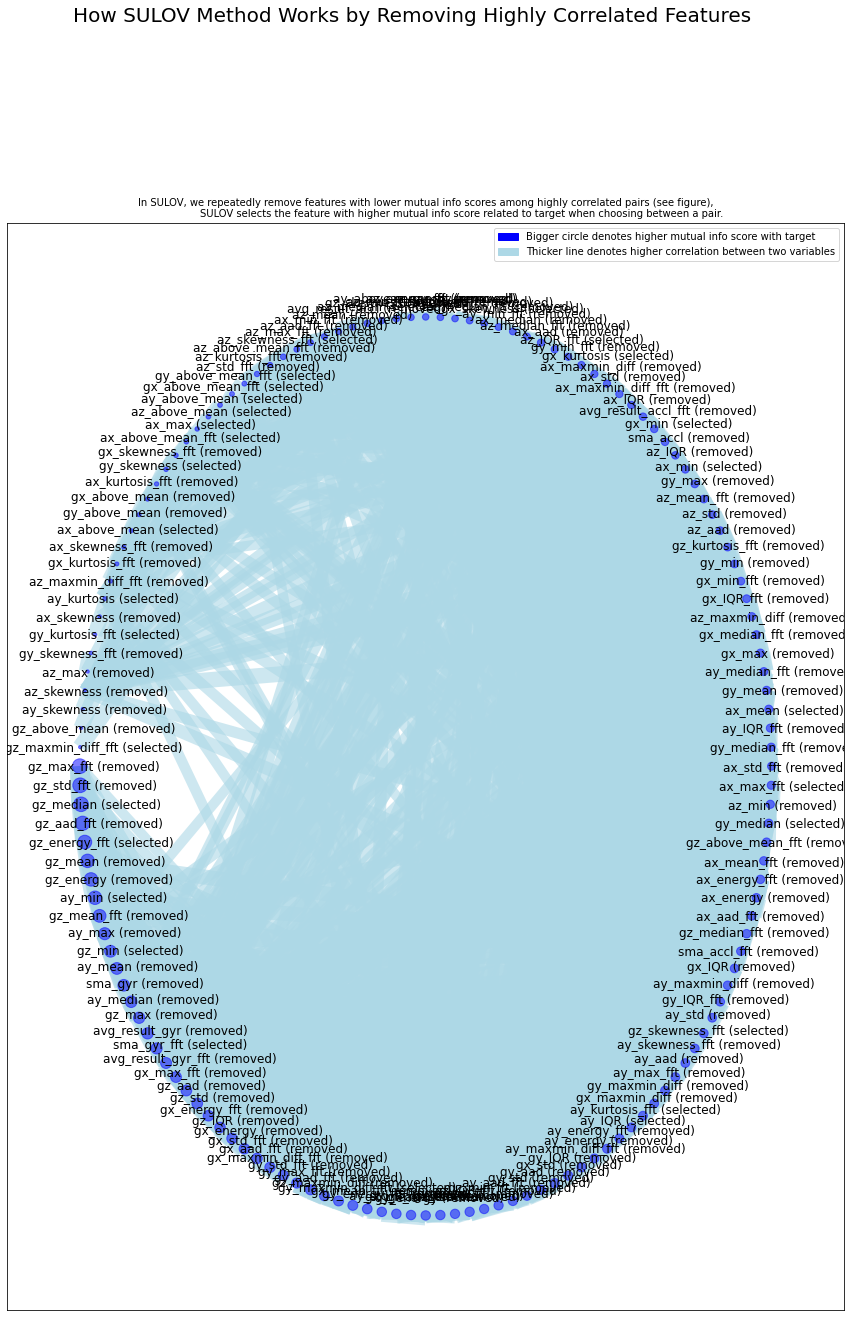

Time taken for SULOV method = 326 seconds
    Adding 0 categorical variables to reduced numeric variables  of 49
Final list of selected vars after SULOV = 49
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 49 
    XGBoost version: 1.6.1
Number of booster rounds = 20
        using 49 variables...
            Time taken for regular XGBoost feature selection = 24 seconds
        using 39 variables...
            Time taken for regular XGBoost feature selection = 34 seconds
        using 29 variables...
            Time taken for regular XGBoost feature select

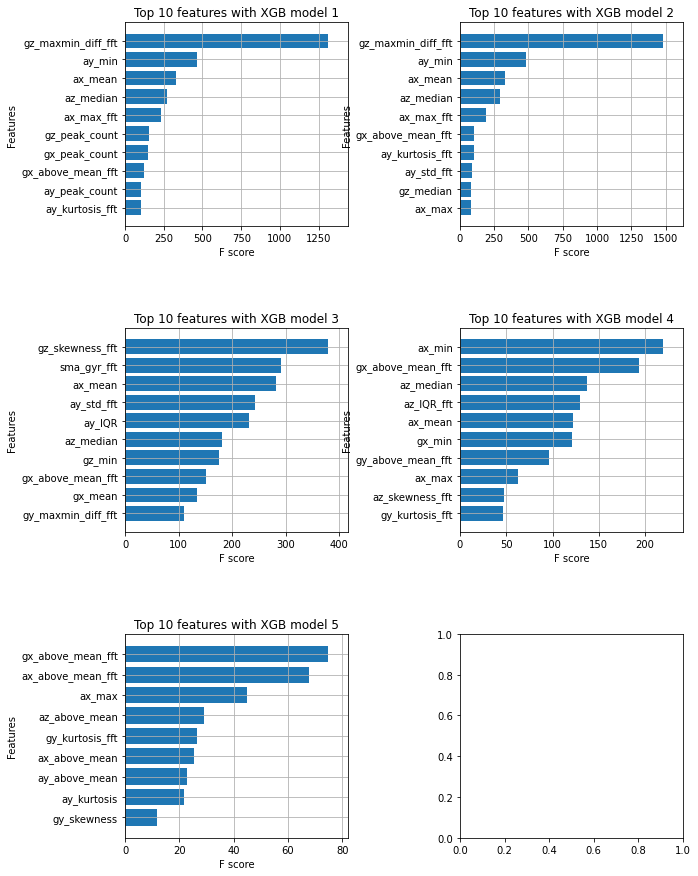

            Total time taken for XGBoost feature selection = 69 seconds
    Alert: No ID variables ['Unnamed0'] are included in selected features
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 41 important features. Too many to print...

    Time taken for feature selection = 396 seconds
Returning 2 dataframes: dataname and test_data with 41 important features.


In [4]:
target = 'labels'

features, train = featurewiz(data, target, corr_limit=0.5, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [5]:
print(features)

['gz_maxmin_diff_fft', 'ay_min', 'ax_mean', 'az_median', 'ax_max_fft', 'gz_peak_count', 'gx_peak_count', 'gx_above_mean_fft', 'ay_peak_count', 'ay_kurtosis_fft', 'gz_median', 'ay_std_fft', 'gz_energy_fft', 'gx_mean', 'gy_peak_count_fft', 'ax_max', 'gz_skewness_fft', 'gy_maxmin_diff_fft', 'ax_peak_count', 'ay_IQR', 'gx_peak_count_fft', 'gy_peak_count', 'gz_min', 'gx_min', 'gy_above_mean_fft', 'ay_peak_count_fft', 'az_peak_count_fft', 'sma_gyr_fft', 'ax_min', 'az_IQR_fft', 'ay_above_mean', 'gy_kurtosis_fft', 'gx_kurtosis', 'ax_above_mean_fft', 'ax_above_mean', 'az_skewness_fft', 'ay_kurtosis', 'az_above_mean', 'gx_skewness', 'gz_skewness', 'gy_skewness']


In [7]:
print(features[:10])

['gz_maxmin_diff_fft', 'ay_min', 'ax_mean', 'az_median', 'ax_max_fft', 'gz_peak_count', 'gx_peak_count', 'gx_above_mean_fft', 'ay_peak_count', 'ay_kurtosis_fft']


In [14]:
X = train.drop(['labels'],axis=1)
 
y = train.labels.values 

In [13]:
X

,ay_min,ax_mean,az_median,ax_max_fft,gz_peak_count,gx_peak_count,gx_above_mean_fft,ay_peak_count,ay_kurtosis_fft,gz_median,...,gy_kurtosis_fft,gx_kurtosis,ax_above_mean_fft,ax_above_mean,az_skewness_fft,ay_kurtosis,az_above_mean,gx_skewness,gz_skewness,gy_skewness
0,-16.77,-2.682667,-1.06,40.240000,2,2,8,5,9.977714,-0.66,...,-0.318984,-0.947705,5,7,-0.066639,4.351574,5,-0.562577,1.070055,-0.009219
1,-12.63,-1.583333,-0.49,31.558951,2,2,6,4,9.932113,0.54,...,-1.285390,-0.658750,7,8,1.293937,-0.192176,9,-0.435086,-0.006209,-0.268496
2,-14.98,-1.522000,-1.30,28.385129,3,4,7,4,9.860745,-0.74,...,-0.361349,1.733919,7,9,0.480391,1.144052,4,-1.411203,0.753199,-0.665903
3,-11.70,-1.558667,-0.69,28.049476,2,4,8,3,10.033427,0.41,...,-1.777877,-0.586313,5,7,1.021326,-1.478904,8,0.203077,0.013333,-0.581497
4,-17.16,-1.096667,-0.90,32.508654,3,4,7,6,9.970894,-0.58,...,-1.566156,0.259132,7,9,0.953568,5.037705,7,0.137966,0.343603,0.690731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193175,-10.55,-3.770000,0.20,56.550000,2,2,3,3,10.016203,-0.03,...,0.750451,-0.451815,1,5,1.318311,-0.546836,8,-0.354543,0.113386,0.003127
193176,-16.21,-3.620000,-0.02,54.300000,4,3,8,4,7.810187,0.06,...,-1.325891,10.056242,7,5,0.681827,8.132508,12,3.470857,1.386436,-1.076924
193177,-9.68,-4.493333,-0.05,67.400000,3,2,5,2,10.019838,0.06,...,1.362163,0.061775,1,7,0.633302,-0.296910,9,0.324727,0.178801,0.005341
193178,-11.83,-4.168000,-1.23,62.520000,2,5,9,3,9.468295,0.08,...,-1.054939,-0.735236,7,6,0.200536,-1.169739,7,0.656823,-0.826381,-0.609360


In [15]:
X_scaled =  StandardScaler().fit_transform(X)

In [16]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y,test_size = 0.3,stratify=y, random_state=1)

In [18]:
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

0.8649618663077613

In [59]:
# using top 10 features

dftop_10 = data[['gz_maxmin_diff_fft', 'ay_min', 'ax_mean', 'az_median', 'ax_max_fft', 'gz_peak_count', 'gx_peak_count', 'gx_above_mean_fft', 'ay_peak_count', 'ay_kurtosis_fft', 'labels']]

In [60]:
X_10 = dftop_10.drop(['labels'],axis=1)
 
y_10 = dftop_10.labels.values 

In [61]:
X_scaled =  StandardScaler().fit_transform(X_10)

In [62]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y_10,test_size = 0.3,stratify=y_10, random_state=1)

In [64]:
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
accuracy_score(preds,y_valid) 

0.8476550367532871

In [23]:
df1 = data[['gz_maxmin_diff_fft', 'ay_min', 'ax_mean', 'az_median', 'ax_max_fft', 'gz_peak_count', 'gx_peak_count', 'gx_above_mean_fft', 'ay_peak_count', 'ay_kurtosis_fft', 'gz_median', 'ay_std_fft', 'gz_energy_fft', 'gx_mean', 'gy_peak_count_fft', 'ax_max', 'gz_skewness_fft', 'gy_maxmin_diff_fft', 'ax_peak_count', 'ay_IQR', 'gx_peak_count_fft', 'gy_peak_count', 'gz_min', 'gx_min', 'gy_above_mean_fft', 'ay_peak_count_fft', 'az_peak_count_fft', 'sma_gyr_fft', 'ax_min', 'az_IQR_fft', 'ay_above_mean', 'gy_kurtosis_fft', 'gx_kurtosis', 'ax_above_mean_fft', 'ax_above_mean', 'az_skewness_fft', 'ay_kurtosis', 'az_above_mean', 'gx_skewness', 'gz_skewness', 'gy_skewness', 'labels']]

In [30]:
df1 = df1.astype(convert_dict)

In [32]:
df1['labels']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
193175    0.0
193176    0.0
193177    0.0
193178    0.0
193179    0.0
Name: labels, Length: 193180, dtype: object

In [7]:
import ppscore as pps

In [33]:
p = pps.predictors(df1, "labels")

In [40]:
p

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,gz_median,labels,0.344954,classification,True,weighted F1,0.5592,0.711256,DecisionTreeClassifier()
1,ay_min,labels,0.259153,classification,True,weighted F1,0.5592,0.673434,DecisionTreeClassifier()
2,gz_min,labels,0.224061,classification,True,weighted F1,0.5592,0.657966,DecisionTreeClassifier()
3,gz_energy_fft,labels,0.199991,classification,True,weighted F1,0.5592,0.647356,DecisionTreeClassifier()
4,gz_maxmin_diff_fft,labels,0.196063,classification,True,weighted F1,0.5592,0.645625,DecisionTreeClassifier()
5,ay_IQR,labels,0.170971,classification,True,weighted F1,0.5592,0.634564,DecisionTreeClassifier()
6,sma_gyr_fft,labels,0.142822,classification,True,weighted F1,0.5592,0.622156,DecisionTreeClassifier()
7,gx_min,labels,0.139389,classification,True,weighted F1,0.5592,0.620643,DecisionTreeClassifier()
8,az_median,labels,0.129406,classification,True,weighted F1,0.5592,0.616242,DecisionTreeClassifier()
9,gy_maxmin_diff_fft,labels,0.117554,classification,True,weighted F1,0.5592,0.611018,DecisionTreeClassifier()


<AxesSubplot:xlabel='x', ylabel='ppscore'>

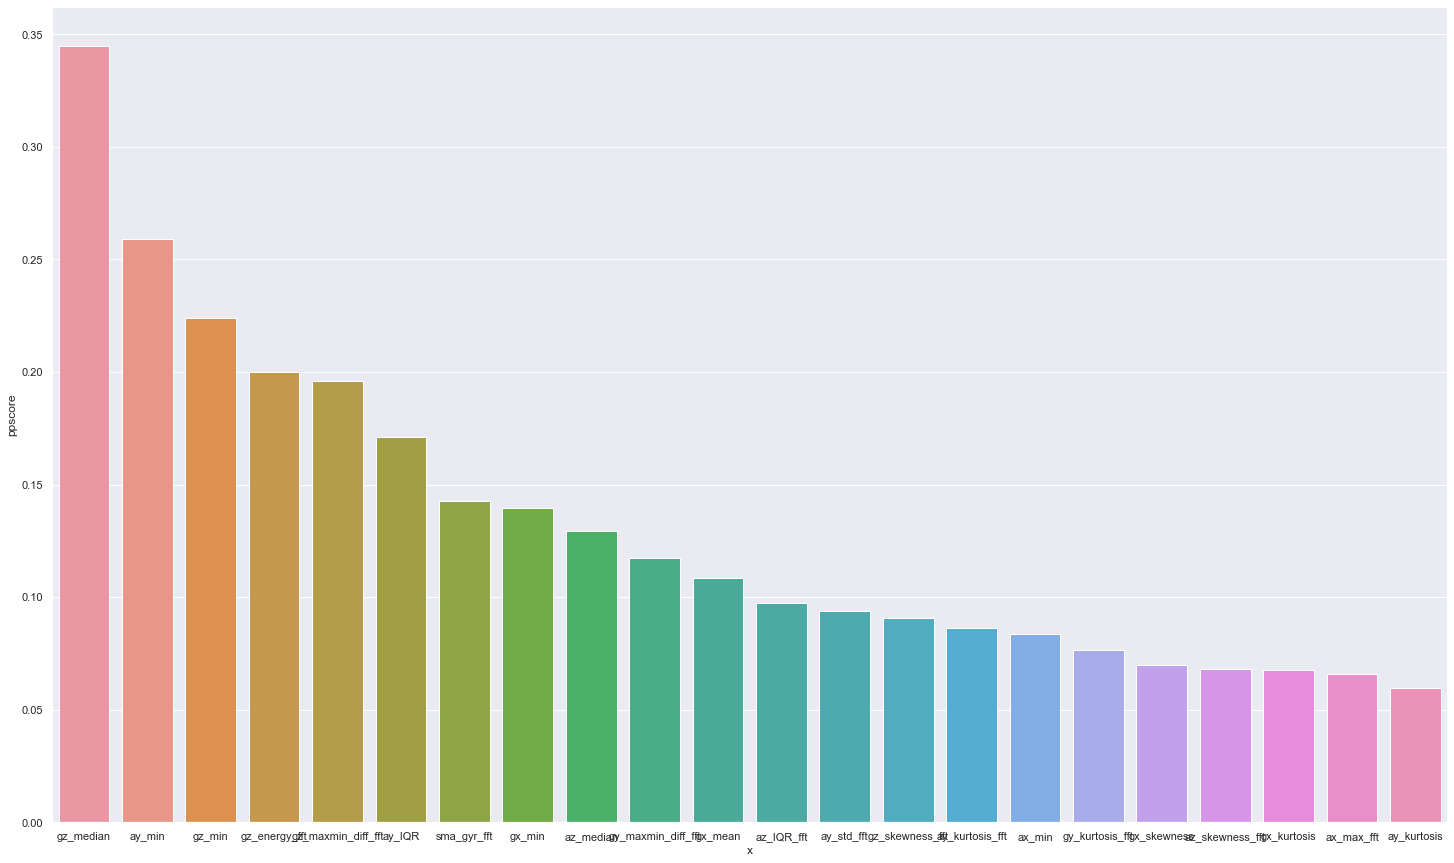

In [41]:
sns.set(rc={'figure.figsize':(25,15)})
sns.barplot(data=p[p['ppscore']>0.05], x="x", y="ppscore")

<AxesSubplot:xlabel='x', ylabel='y'>

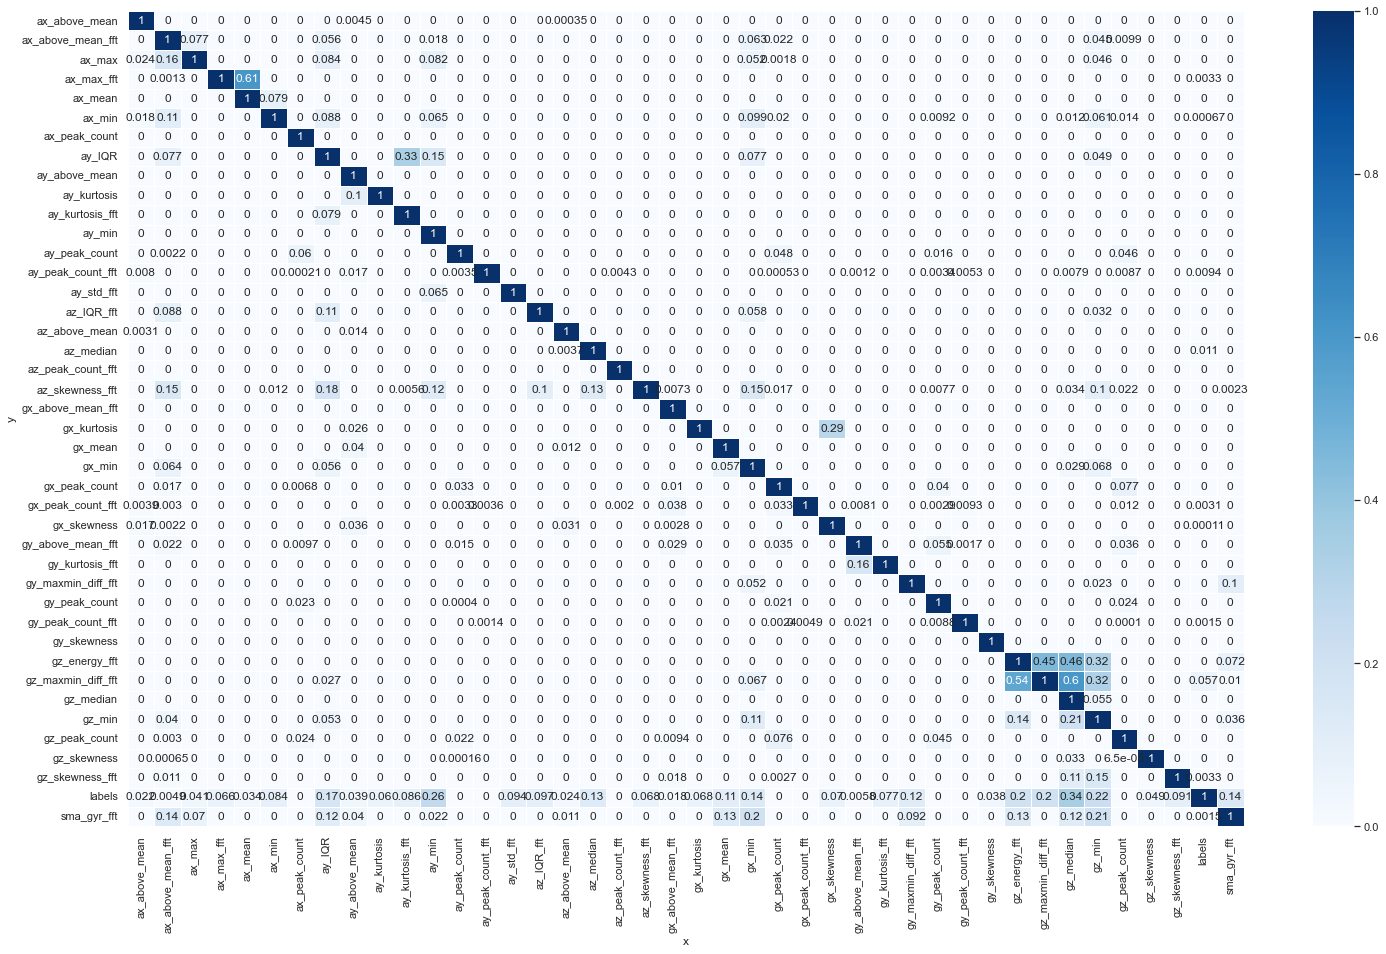

In [42]:
sns.set(rc={'figure.figsize':(25,15)})
matrix_df = pps.matrix(df1)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

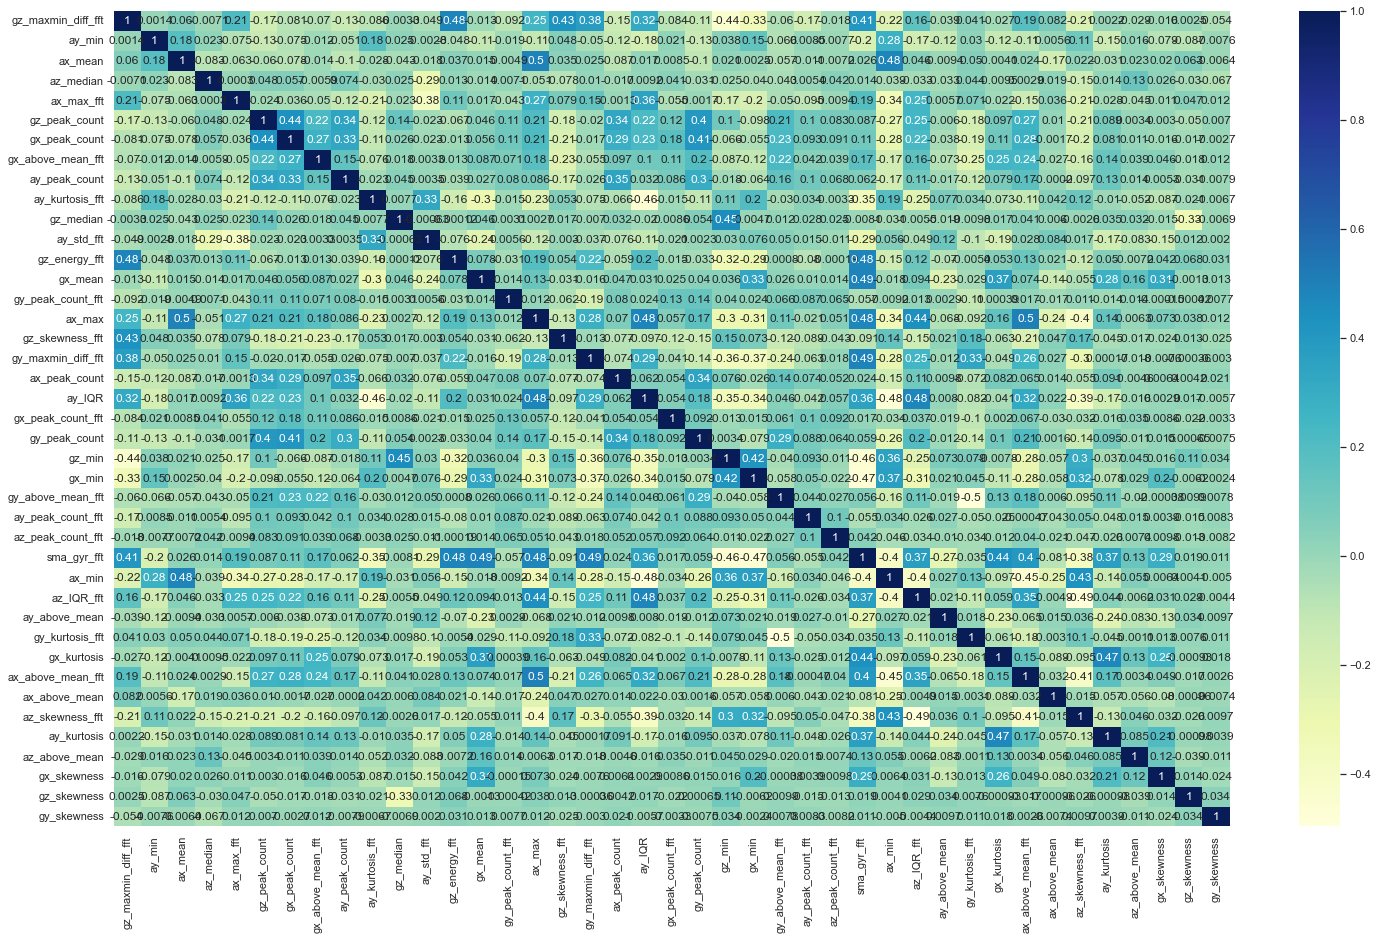

In [48]:
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()